In [15]:
#importing required libraries
import numpy as np
import pandas as pd

def calculate_probabilities(parameters, data):
    #Error handling 
    try:
        # Checking for same dimensions for all input data
        data_lengths = [len(v) for v in data.values()]
        if len(set(data_lengths)) > 1:
            raise ValueError("Input data arrays must all be the same length.")

        # Checking if the parameters values correctly passed in the dictionary
        required_parameters = ['beta01', 'beta1', 'beta2', 'beta02', 'beta03', 'betaS113', 'betaS123']
        for param in required_parameters:
            if param not in parameters:
                raise ValueError(f"Missing required parameter: {param}")

        # Checking if the data values correctly passed in the dictionary
        for key in ['X1', 'X2', 'Sero', 'S1', 'AV1', 'AV2', 'AV3']:
            if key not in data:
                raise ValueError(f"Missing required data: {key}")
                
        # Extracting corresponding data values from 'data' dictionary
        X1 = np.array(data['X1'])
        X2 = np.array(data['X2'])
        Sero = np.array(data['Sero'])
        S1 = np.array(data['S1'])
        AV1 = np.array(data['AV1'])
        AV2 = np.array(data['AV2'])
        AV3 = np.array(data['AV3'])
        
        # Extracting parameters,from the 'parameters' dictionary
        beta01 = parameters['beta01']
        beta1 = parameters['beta1']
        beta2 = parameters['beta2']
        beta02 = parameters['beta02']
        beta03 = parameters['beta03']
        betaS113 = parameters['betaS113']
        betaS123 = parameters['betaS123']

        # Utility functions for each deterministic utilities
        def V1(x1, s1):
            return beta01 + beta1*x1 + betaS113*s1

        def V2(x2, s1):
            return beta02 + beta2*x2 + betaS123*s1

        def V3(sero):
            return beta03+beta1*sero+beta2*sero

        # Data points
        data_points = list(range(1, len(X1) + 1))

        # Calculating probabilities for each alternative values
        exp_sum = AV1*np.exp(V1(X1, S1)) + AV2*np.exp(V2(X2, S1)) + AV3*np.exp(V3(Sero)) #exponent sum which is common for all denominators of P1,P2,P3
        P1 = AV1*np.exp(V1(X1, S1)) / exp_sum
        P2 = AV2*np.exp(V2(X2, S1)) / exp_sum
        P3 = AV3*np.exp(V3(Sero)) / exp_sum

        # Creating a DataFrame to display the output 
        probabilities_df = pd.DataFrame({'Data Point': data_points, 'P1': P1, 'P2': P2, 'P3': P3})

        # Setting the index to start from 1
        probabilities_df.index = probabilities_df.index + 1

        # Dropping the duplicate index column "Data Point"
        probabilities_df = probabilities_df.drop(columns=['Data Point'])

        # Print DataFrame with modified index
        print("Probabilities DataFrame: Rows represents data points and Columns represents corresponding probabilities of the data points")
        print(probabilities_df)

        # Output of the probabilities into a dictionary
        probabilities_dict = {'P1': P1.tolist(), 'P2': P2.tolist(), 'P3': P3.tolist()}

        # Saving the output to .txt file
        with open('probabilities_output.txt', 'w') as f:
            f.write("Probabilities Output:\n")
            for key, value in probabilities_dict.items():
                f.write(f"{key}: {value}\n")

        return probabilities_dict #function returns a dictionary dictionary with keys representing each alternative and valuesas lists containing the calculated probabilities for each data points

    except ValueError as e:
        print(f"Error: {e}")
        return None


In [16]:
# Given Sample data and parameters values
data = {
    'X1': [2,1,3,4,2,1,8,7,3,2],
    'X2': [8,7,4,1,4,7,2,2,3,1],
    'Sero':[0,0,0,0,0,0,0,0,0,0],
    'S1': [3,8,4,7,1,6,5,9,2,3],
    'AV1': [1,1,1,1,1,0,0,1,1,0],
    'AV2': [1,1,1,0,0,1,1,1,0,1],
    'AV3': [1,1,0,0,1,1,1,1,1,1]
}
parameters = {
    'beta01': 0.1,
    'beta1': -0.5,
    'beta2': -0.4,
    'beta02': 1,
    'beta03': 0,
    'betaS113': 0.33,
    'betaS123': 0.58
}


# Calculate probabilities function call
probabilities = calculate_probabilities(parameters, data)
probabilities_df = pd.DataFrame(probabilities)

Probabilities DataFrame: Rows represents data points and Columns represents corresponding probabilities of the data points
          P1        P2        P3
1   0.401464  0.231625  0.366911
2   0.341463  0.622186  0.036352
3   0.141851  0.858149  0.000000
4   1.000000  0.000000  0.000000
5   0.361237  0.000000  0.638763
6   0.000000  0.842905  0.157095
7   0.000000  0.956893  0.043107
8   0.002859  0.992746  0.004395
9   0.323004  0.000000  0.676996
10  0.000000  0.912136  0.087864


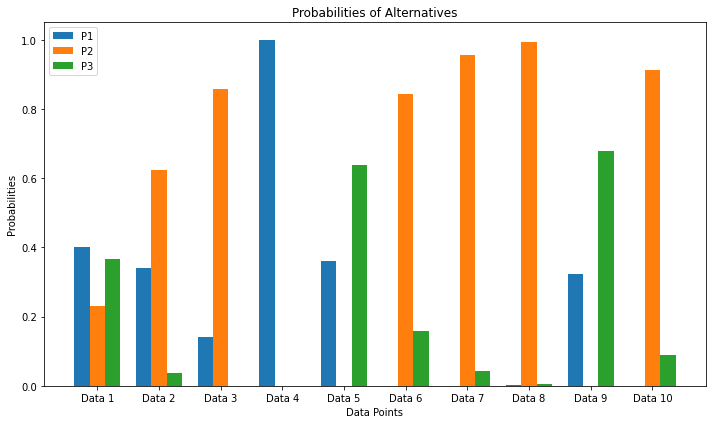

In [17]:

#plotting a histogram for probabilities vs data points values for visualization
import matplotlib.pyplot as plt
import numpy as np


# Adjusting the starting point of data_points to align with DataFrame index
data_points = list(range(1, len(probabilities_df) + 1))  # Starts from 1
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
# Adjusting for zero-based indexing with `np.array(data_points) - 1`
bar1 = ax.bar(np.array(data_points) - 1, probabilities_df['P1'], bar_width, label='P1')
bar2 = ax.bar(np.array(data_points) - 1 + bar_width, probabilities_df['P2'], bar_width, label='P2')
bar3 = ax.bar(np.array(data_points) - 1 + 2*bar_width, probabilities_df['P3'], bar_width, label='P3')

ax.set_xlabel('Data Points')
ax.set_ylabel('Probabilities')
ax.set_title('Probabilities of Alternatives')
# Adjusting for the x-ticks to correctly align with the bars
ax.set_xticks(np.array(data_points) - 1 + bar_width)
ax.set_xticklabels([f'Data {i}' for i in data_points])  # Directly use the adjusted data_points list
ax.legend()

plt.tight_layout()
plt.show()


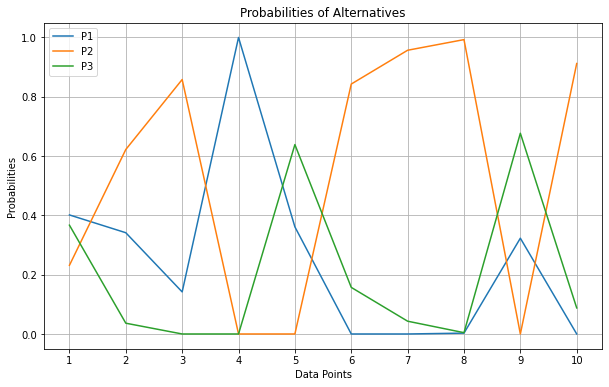

In [18]:
import matplotlib.pyplot as plt

# Plotting line graphs for probabilities of each alternative
plt.figure(figsize=(10, 6))

data_point_labels = [i+1 for i in range(len(probabilities['P1']))] # Generate labels starting from 1

for alternative, probs in probabilities.items():
    plt.plot(data_point_labels, probs, label=alternative)  # Use the updated data point labels

plt.xlabel('Data Points')
plt.ylabel('Probabilities')
plt.title('Probabilities of Alternatives')
plt.xticks(data_point_labels)  # Set x-axis ticks to the updated data point labels
plt.legend()
plt.grid(True)
plt.show()
